# Wave with periodic bc with the scheme from Palma

We solve the wave equation with Dirichlet boundary conditions (homogeneous) up to $T = 2L$ where $L$ is the space size of the integrating region. The data is reflection symmetric, $u_0(x) = u_0(L-x)$ For the time derivative we take  $\partial_t u(x,t=0) = 0$ or $\partial_t u(x,t=0) = \partial_x(x,t=0)$. This way at the last point the solution repeats itself and we can measure the error very well.

In [1]:
using ComponentArrays
using Distributions
#using WGLMakie
using Lux
using LuxCUDA
using OptimizationOptimJL
using Random
using UnPack
using Zygote
#using CairoMakie  # Backend que funciona en notebooks
using StatsBase
using Revise
using JLD2
using Plots
using LinearAlgebra
#import NaNMath



I put some functions here.

In [2]:
includet("../../neural_tools.jl")
includet("wave_ini_bound_data.jl")

ERROR: UndefVarError: `config` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Stacktrace:
 [1] macro expansion
   @ ~/.julia/packages/UnPack/EkESO/src/UnPack.jl:100 [inlined]
 [2] top-level scope
   @ ~/Julia/PINN/Wave_equations/With_FD/wave_ini_bound_data.jl:6
in expression starting at /users/oreula/Julia/PINN/Wave_equations/With_FD/wave_ini_bound_data.jl:6


In [3]:
#@load "wave_dirichlet_1D_u0_sin_u1_zero_p8_SSB.jld2" config Θ st losses
#@load "wave_dirichlet_1D_u0_sin_u1_zero_p8_SSB.jld2" u0 u1 Θ st config losses
#@load "wave_dirichlet_1D_test.jld2" u0 u1 Θ st config losses
@load "wave_dirichlet_1D_u0_sin_u1_zero_p8_BB.jld2" Θ st config losses #u0 u1 

NN = create_chain(config)

get_parameter_count(config)

config[:N_rounds]*config[:iters_per_round]

25000

In [4]:
# -------------------------------------------------------------------
# Second order wave equation (onda 1D): u_tt - c^2 u_xx = 0
# -------------------------------------------------------------------
#wave_equation(∂2u_∂x2, ∂2u_∂t2, c) = ∂2u_∂t2 .- (c^2) .* ∂2u_∂x2

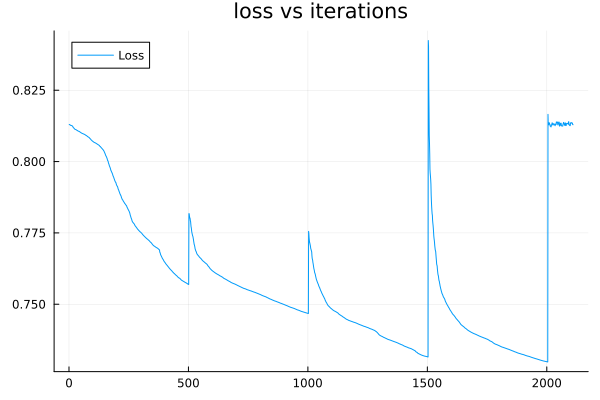

In [5]:
plot(losses, label = "Loss", title = "loss vs iterations")


In [ ]:
@unpack xmin, xmax, p, A = config

t = 0.2 #config[:tmax]
xs = reshape(collect(range(config[:xmin], config[:xmax], length=200)), 1, :)
t_fix = reshape(fill(t, length(xs)), 1, :)
#sol_p = [calculate_Dirichlet_f(xs, t_fix, NN, Θ, st) for x in xs]
sol_p = [calculate_Dirichlet_f_wf(xs[:,i], t_fix[:,i], NN, Θ, st)[1] for i in 1:length(xs[1,:])]


plot(xs[1,:],sol_p, label = "t=$t", title = "solution")
#plot!(xs[1,:],config[:A]*(xs[1,:] .- config[:xmin]).^4 .* (xs[1,:] .- config[:xmax]).^4/((config[:xmax]-config[:xmin])/2)^8, label = "initial condition", linestyle = :dash)     


The error looks like a polynomial of order 10.

In [ ]:
plot(title = "solution")
t = 2.0
xs = reshape(collect(range(config[:xmin], config[:xmax], length=200)), 1, :)
t_fix = reshape(fill(t, length(xs)), 1, :)
#sol_p = [calculate_Dirichlet_f(xs, t_fix, NN, Θ, st) for x in xs]
sol_p = [calculate_Dirichlet_f(xs[:,i], t_fix[:,i], NN, Θ, st)[1] for i in 1:length(xs[1,:])]

plot!(xs[1,:],sol_p .- (config[:A]*(xs[1,:] .+ config[:xmin]).^4 .* (xs[1,:] .- config[:xmax]).^4)*2^8, label = "t=0")
#lines!(xs[1,:],bump.(xs[1,:], config[:x0], config[:x1], config[:p], config[:A]), label = "initial condition")
#lines!(xs[1,:],sol_p .-config[:A]*(xs[1,:] .- config[:xmin]).^4 .* (xs[1,:] .- config[:xmax]).^4, label = "initial condition", linestyle = :dash)     


In [ ]:
norm(sol_p .- (config[:A]*(xs[1,:] .+ config[:xmin]).^4 .* (xs[1,:] .- config[:xmax]).^4)*2^8)/norm(config[:A]*(xs[1,:] .- config[:xmin]).^4 .* (xs[1,:] .- config[:xmax]).^4)/sqrt(length(xs[1,:]))

Norm Error = 0.02606418374105666, When loss = -3.5 

In [ ]:
norm([1,1,1])/sqrt(length([1,1,1]))